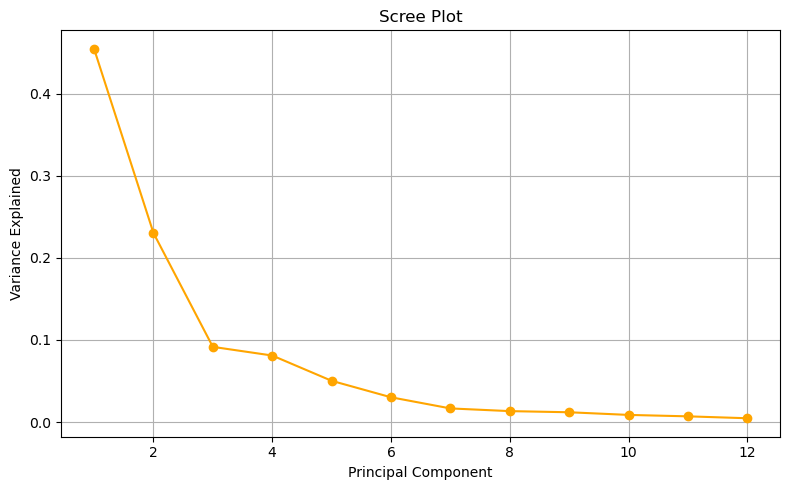

First 5 rows of transformed dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.308365 -0.931713  0.057042  2.292632  0.373401 -0.860491  0.698127   
1 -2.034947 -2.803698  1.675399  1.155492 -0.805882  0.460336  0.030189   
2 -2.552441 -2.012644  2.687010  0.521291 -0.164976  0.426913 -0.271561   
3 -1.638918 -0.438149  1.718712  1.365928  0.127042  0.208062 -0.471407   
4 -0.221407 -2.673904  0.400004  2.103663 -0.004738  1.094805 -0.157765   

        PC8       PC9      PC10      PC11      PC12  
0 -0.070821  0.250047 -0.221815  0.171945 -0.096920  
1 -0.460140 -0.723536 -0.720846  0.049635  0.245461  
2  0.297512  0.433693 -0.355521  0.280934  0.043486  
3  0.128870 -0.286339  0.433536  0.112368 -0.006389  
4 -0.030095 -0.451535  1.034062 -0.030670 -0.532711  


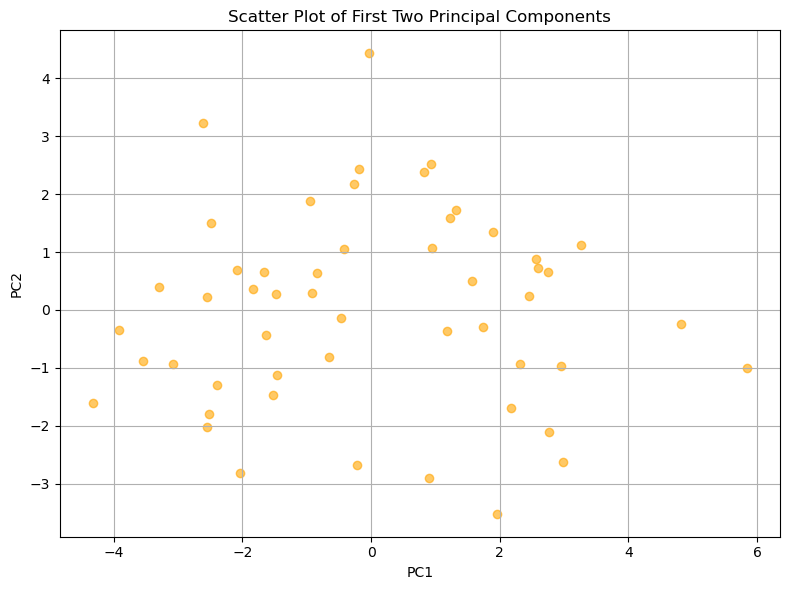

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv("roles_life_cycle_mapping_wide.csv")

# Step 2: Data Preprocessing - select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Standardize to zero mean and unit variance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 3: Perform PCA
pca = PCA()
pca_components = pca.fit_transform(df_scaled)

# Step 4: Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker='o', color='orange')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Output transformed dataset
transformed_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
print("First 5 rows of transformed dataset:")
print(transformed_df.head())

# Step 6: Scatter Plot of First Two Principal Components
plt.figure(figsize=(8, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'], alpha=0.6, color='orange')
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Load the BMI dataset
file_path = "BMI.csv"
bmi_df = pd.read_csv(file_path)

# Show basic structure
bmi_df.info(), bmi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   Neck     252 non-null    float64
 4   Chest    252 non-null    float64
 5   Abdomen  252 non-null    float64
 6   Hip      252 non-null    float64
 7   Thigh    252 non-null    float64
 8   Knee     252 non-null    float64
 9   Ankle    252 non-null    float64
 10  Biceps   252 non-null    float64
 11  Forearm  252 non-null    float64
 12  Wrist    252 non-null    float64
 13  fatpctg  252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


(None,
    Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
 0   22   160.8    62.4  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
 1   22   170.6    80.5  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
 2   23   153.9    69.3  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
 3   23   157.1    70.4  35.5   92.1     77.1   93.9   56.1  36.1   22.7   
 4   23   196.5    88.6  38.0   96.6     85.3  102.5   59.1  37.6   23.2   
 
    Biceps  Forearm  Wrist  fatpctg  
 0    28.8     25.2   16.6     25.3  
 1    30.5     28.9   18.2      6.1  
 2    32.0     27.4   17.1     12.3  
 3    30.5     27.2   18.2      9.4  
 4    31.8     29.7   18.3     10.3  )

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
df = pd.read_csv("BMI.csv")

# Drop 'Age' as specified
df = df.drop(columns=["Age"])

# Split features and target
X = df.drop(columns=["fatpctg"])
y = df["fatpctg"]

# 1. Wrapper Method - RFE with Linear Regression
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5)
rfe.fit(X, y)
wrapper_features = X.columns[rfe.support_].tolist()

# 2. Embedded Method - LassoCV
lasso = LassoCV(cv=5)
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index=X.columns)
embedded_features = coef.abs().sort_values(ascending=False).head(5).index.tolist()

# 3. Filter Method - Pearson Correlation
correlations = df.corr()["fatpctg"].drop("fatpctg").abs()
filter_features = correlations.sort_values(ascending=False).head(5).index.tolist()

# Output results
print("Wrapper Method (RFE) - Top 5 Features:", wrapper_features)
print("Embedded Method (Lasso) - Top 5 Features:", embedded_features)
print("Filter Method (Correlation) - Top 5 Features:", filter_features)


Wrapper Method (RFE) - Top 5 Features: ['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist']
Embedded Method (Lasso) - Top 5 Features: ['Abdomen', 'Weight', 'Neck', 'Height', 'Thigh']
Filter Method (Correlation) - Top 5 Features: ['Abdomen', 'Chest', 'Hip', 'Weight', 'Thigh']
